Each User's Room Summary:
   User_ID  Total_Rooms  Number_of_Rooms
0        1            3                2
1        2            1                3
2        3            2                4
3        4            1                3
Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

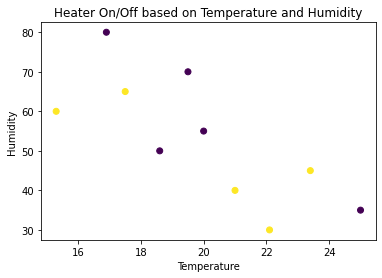

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib

# Simulate smart home system data, including temperature, humidity, time of day, and whether the heater is on
# Now includes user data with room numbers and number of rooms per house
data = {
    'User_ID': [1, 2, 1, 3, 4, 2, 3, 1, 4, 2],
    'Room_Number': [101, 102, 103, 104, 101, 102, 103, 104, 101, 102],
    'Number_of_Rooms': [2, 3, 2, 4, 3, 3, 4, 2, 3, 3],
    'Temperature': [22.1, 18.6, 23.4, 16.9, 25.0, 15.3, 20.0, 19.5, 21.0, 17.5],
    'Humidity': [30, 50, 45, 80, 35, 60, 55, 70, 40, 65],
    'Time_of_Day': [6, 12, 18, 0, 15, 9, 19, 23, 10, 14],
    'Heater_On': [1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(data)

# Create a table with room statistics for each user
user_room_summary = df.groupby('User_ID').agg(
    Total_Rooms=('Room_Number', 'nunique'),
    Number_of_Rooms=('Number_of_Rooms', 'first')  # Assuming each user has a consistent number of rooms
).reset_index()

# The statistics table is displayed
print("Each User's Room Summary:")
print(user_room_summary)

# Features and targets
X = df[['Temperature', 'Humidity', 'Time_of_Day', 'Number_of_Rooms']]
y = df['Heater_On']

# Split the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Using a support Vector Machine model (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# predicted
y_pred = svm_model.predict(X_test)

# output
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save model
joblib.dump(svm_model, 'svm_smart_home_model.pkl')

# Visual
plt.scatter(df['Temperature'], df['Humidity'], c=df['Heater_On'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Heater On/Off based on Temperature and Humidity')
plt.show()
